In [1]:
from PIL import Image
import numpy
import pandas as pd
from numpy import array
import numpy as np
from sklearn import cluster, datasets, metrics
from sklearn.cluster import DBSCAN
from tkinter import _flatten
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Q1

In [2]:
#reading data
image_matrix = np.zeros((400, 2576))
gender = np.array([])
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open("E:/course/資料分析/Homework/HW6/ORL Faces/%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        image_matrix[i+j*10] = image_array.flatten()
gender = [10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[0],10*[1],10*[0]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]]
gender = list(_flatten(gender))
X = image_matrix

In [3]:
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

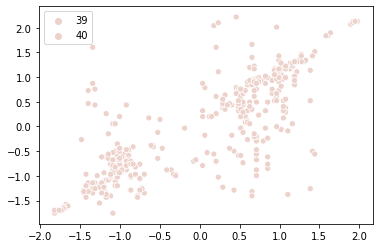

In [4]:
sns.scatterplot(X_nor[:,0],X_nor[:,9],hue=40)

In [5]:
#K mean
kmeans_fit = cluster.KMeans(n_clusters = 2).fit(X_nor)

In [6]:
kcluster_labels = kmeans_fit.labels_
print("Cluster Result：")
print(kcluster_labels)
print("---")

Cluster Result：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
---


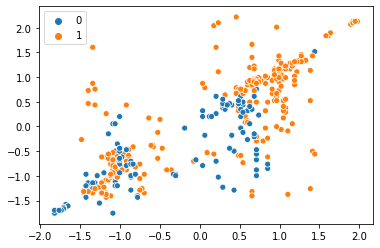

In [7]:
sns.scatterplot(X_nor[:,0],X_nor[:,9],hue=kcluster_labels)

In [8]:
k=0
for i in range(0,400):
    if kcluster_labels[i] == gender[i]:
        k+=1
print("Accuracy: ",k/400*100,"%")

Accuracy:  57.25 %


In [9]:
# Hierarchical Clustering
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 2)
hclust.fit(X_nor)
hcluster_labels = hclust.labels_
print(hcluster_labels)
print("---")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
---


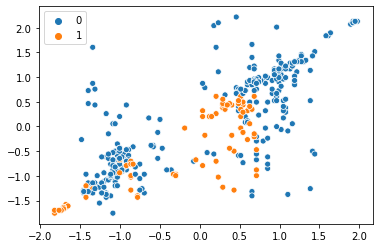

In [10]:
sns.scatterplot(X_nor[:,0],X_nor[:,9],hue=hcluster_labels)

In [11]:
k2=0
for i in range(0,400):
    if hcluster_labels[i] == gender[i]:
        k2+=1
print("Accuracy: ",k2/400*100,"%")

Accuracy:  30.0 %


From the both clustering results, we know that they match the two genders badly! However, the result of K mean is better.

# Q2

In [12]:
#reading data
df = pd.read_csv('E:/course/資料分析/Homework/hw5/auto-mpg.data.csv')

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [14]:
y = df[['origin']].values.reshape(-1, 1)

In [15]:
x = df.drop('origin', axis = 1).values

In [16]:
scaler = StandardScaler()

In [17]:
x_nor = scaler.fit_transform(x)

In [18]:
#K mean
kmeans__fit = cluster.KMeans(n_clusters = 3).fit(x_nor)

In [19]:
cluster__labels = kmeans__fit.labels_
print("Cluster Result：")
print(cluster__labels)
print("---")

Cluster Result：
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 1 1 1 1 1 1 0 2 2 2 2 1 1 1 0 0 0 0 0
 2 2 2 2 2 2 2 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 1 2 2 2 2 0 1 1 1 1
 1 0 1 2 2 1 1 1 0 2 1 0 2 0 0 0 1 1 1 1 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 2 0 0 0 2 2 2 2 1 1 1 1 1 2 0 2
 2 0 0 0 0 2 2 2 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 2 2 0 0 0 1 0 0 0 0 0
 0 2 0 2 2 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 2 2 2 2 2 0 2 1 1 1 1 0
 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]
---


In [20]:
k = 0
for i in range(0,392):
    if (cluster__labels[i]+1) == y[i]:
        k+=1
print("Accuracy: ",k/392*100,"%")

Accuracy:  35.45918367346938 %


In [21]:
# Hierarchical Clustering
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)
hclust.fit(x_nor)
hcluster__labels = hclust.labels_
print(hcluster__labels)
print("---")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 0 0 0 0 0 2 1 1 1 1 0 0 0 2 2 2 2 2
 1 1 1 1 1 1 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 1 1 1 1 2 0 0 0 0
 0 2 0 1 1 0 0 0 0 1 0 2 1 2 2 2 0 0 0 0 2 2 2 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 1 1 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 0 1 0 2 2 1 1 1 1 0 0 0 0 0 1 2 1
 1 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 1 1 2 2 2 0 2 2 2 2 2
 2 1 2 1 1 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 2 0 2 2 1 1 1 1 1 1 1 1 0 0 0 0 0
 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
---


In [22]:
h = 0
for i in range(0,392):
    if (hcluster__labels[i]+1) == y[i]:
        h+=1
print("Accuracy: ",h/392*100,"%")

Accuracy:  20.153061224489797 %


In [23]:
#DBscan
DBscan_cluster=DBSCAN(eps=0.8,min_samples = 4).fit(x_nor)
DBcluster_labels = DBscan_cluster.labels_
print(DBcluster_labels)
print("---")

[ 0  0  0  0  0  1  1  1  1 -1  0 -1 -1 -1  2  3  3  3  2  2  2  2  2  2
  3 -1 -1 -1 -1  2  2  2  3  3  3  3  3  0  0  0  0  0  0  0  3  2  3  3
  2  2  2  2  2  2  2  2  2  2 -1  2  2  0  0  0  0  0  4  0  0  0 -1  0
  0  0  0 -1  2  2  2  2  2  2  2  2  0  0  0  0  0  4  0  0  0  4  4  0
  3  3  3  3  3  2  0  0  0  0  3  2  2  2 -1  2 -1  2  0 -1  2  2  2 -1
  0  2 -1 -1  3  3  3  2  2  2  2  3  3  3  0  0  0  0  0  2  2  2  2  2
  2  2  2  2  2  2  3  3 -1 -1  0  0  0  0 -1  3  3  3  3 -1 -1  2  2  3
  2  2  2  2  3  2  3  2  2  2  2  2  2  2  2  2  2  0  0  0  0  3  3  3
  3 -1 -1  2  2  3 -1  3  3  2  2  2  2  2  0 -1 -1 -1  0  0  0  0  2  2
  2  2  2  0 -1  0  0  3  3  3  3  0  0  0  0  2  2  2  2  2  2  2  2 -1
  2  2 -1  2  2  2  2  0  0  0  3  3  3  2  3  3  3  3  3  3  0 -1  0  0
  2  2  2  2  2  2  2  2  2 -1  2 -1  2  2  3  3  2  3  3  0  0  0  0  0
  0  0  0  2  2  2  2 -1 -1 -1 -1  2  2  2  2  2  5  5  2  2  2  2  2  2
  2  2  3  2  2  2  2  2 -1  2  2 -1 -1 -1 -1  2  2

In [24]:
D = 0
for i in range(0,392):
    if (DBcluster_labels[i]+1) == y[i]:
        D+=1
print("Accuracy: ",D/392*100,"%")

Accuracy:  37.755102040816325 %


1. They don't match the origin well. However, DBscan is better than others.
2. Compare the results with those from the supervised learning methods, we know that the accuracy decreases significantly without the ground truth. Hence, it's better to use the supervised learning methods if it's available.